<a href="https://colab.research.google.com/github/vivianchen98/CAPTCHA-Booster/blob/main/CS_4501_V_%26_L_Final_project_CAPTCHA_Project_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 4501 Vision and Language Final Project #
Shenghui (Vivian) Chen (sc9by) 

Sophia Cheung (xz3ts) 

Margaret Cheng (cc8da)

## Import data ##

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip "/content/drive/My Drive/2020 Fall/CS 4501 V&L/samples.zip"

Archive:  /content/drive/My Drive/2020 Fall/CS 4501 V&L/samples.zip
replace samples/226md.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


## Process Data

In [ ]:
import torch, os
import matplotlib.pyplot as plt
from PIL import Image
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import Compose, ToTensor

DATASET_PATH = "/content/samples"

source = [str(i) for i in range(0, 10)]
source += [chr(i) for i in range(97, 97+26)]
alphabet = ''.join(source)

class mydataset(Dataset):

    def __init__(self, folder = 'DATASET_PATH', img_transform=None, alphabet=alphabet, num_class=36):
        self.DATASET_PATH = "/content/samples"
        print('Loading %s ...' % self.DATASET_PATH, end = '\n')
        self.image_file_paths = [os.path.join(folder, image_file) for image_file in os.listdir(folder)]
        self.labels = [filename.split('.')[0] for filename in os.listdir(folder)]
        self.transforms = img_transform
        self.alphabet = alphabet
        self.num_class = 36
        print('Finished')

    def __len__(self):
        return (len(self.labels))

    def __getitem__(self, index):
        # Load images on the fly.
        image_root = self.image_file_paths[index]
        image_name = image_root.split(os.path.sep)[-1]
        image = Image.open(image_root).convert('RGB')
        if self.transforms is not None:
            image = self.transforms(image)

        # Load label, how to encode?
        label = self.labels[index]
        target = []
        for char in label:
          vec = [0] * self.num_class
          vec[alphabet.find(char)] = 1
          print(vec)
          target.append(vec)


        return image, label, torch.Tensor(target)

Print one element from this dataset, both the image and the label

Loading /content/samples ...
Finished
Data size: 1070 samples
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


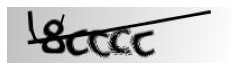

size of img:  200 50 total pixel:  10000
Label:  8cccc
Target:  tensor([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])


In [ ]:
# Display use
dataset = mydataset(DATASET_PATH, img_transform=None)
print('Data size: %d samples' % len(dataset))

ID = 333
img, label, target = dataset[ID]

# Show input image.
plt.figure(figsize=(4,5));plt.imshow(img); plt.axis(False);plt.show()
width, height = img.size
print("size of img: ", width, height, "total pixel: ", width*height)
print('Label: ', label)
print('Target: ', target)

In [ ]:
# Real dataset
from torch.utils.data import random_split

img_transforms = Compose([ToTensor()])
dataset = mydataset(DATASET_PATH, img_transform=img_transforms)
train_set, val_set = random_split(dataset, [700, 370], generator=torch.Generator().manual_seed(42))
print(len(train_set))
print(len(val_set))

batch_size = 10
train_data_loader = DataLoader(train_set, batch_size=batch_size, num_workers=0, shuffle=True, drop_last=True)
val_data_loader = DataLoader(val_set, batch_size=batch_size, num_workers=0, shuffle=True, drop_last=True)

Loading /content/samples ...
Finished
700
370


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch.nn as nn

class CNN(nn.Module):
	def __init__(self, num_class=36, num_char=5):
	    super(CNN, self).__init__()
	    self.num_class = num_class
	    self.num_char = num_char
	    self.conv = nn.Sequential(
	            #batch*1*200*50
	            nn.Conv2d(3, 16, 3, padding=(1, 1)),
	            nn.MaxPool2d(2, 2),
	            nn.BatchNorm2d(16),
	            nn.ReLU(),
	            #batch*16*90*50
	            nn.Conv2d(16, 64, 3, padding=(1, 1)),
	            nn.MaxPool2d(2, 2),
	            nn.BatchNorm2d(64),
	            nn.ReLU(),
	            #batch*64*45*25
	            nn.Conv2d(64, 512, 3, padding=(1, 1)),
	            nn.MaxPool2d(2, 2),
	            nn.BatchNorm2d(512),
	            nn.ReLU(),
	            #batch*512*22*12
	            nn.Conv2d(512, 512, 3, padding=(1, 1)),
	            nn.MaxPool2d(2, 2),
	            nn.BatchNorm2d(512),
	            nn.ReLU(),
	            #batch*512*11*6
	            )
	    self.fc = nn.Linear(512*12*3, self.num_class*self.num_char)
	    
	def forward(self, x):
	    x = self.conv(x)
	    x = x.view(-1, 512*12*3)
	    x = self.fc(x)
	    return x

In [ ]:
import time
from torch.autograd import Variable

batch_size = 128
base_lr = 0.001
max_epoch = 200
model_path = './models/model.pth'
# restor = False

def train():
    cnn = CNN()
    if torch.cuda.is_available():
        cnn.cuda()
#     if restor:
#         cnn.load_state_dict(torch.load(model_path))
# #        freezing_layers = list(cnn.named_parameters())[:10]
# #        for param in freezing_layers:
# #            param[1].requires_grad = False
# #            print('freezing layer:', param[0])
    
    optimizer = torch.optim.Adam(cnn.parameters(), lr=base_lr)
    criterion = nn.MultiLabelSoftMarginLoss()
    
    for epoch in range(max_epoch):
        start_ = time.time()
        
        loss_history = []
        acc_history = []
        cnn.train()
        for img, label, target in train_data_loader:
            # img = Variable(img)
            # target = Variable(target)
            if torch.cuda.is_available():
                img = img.cuda()
                target = target.cuda()
            output = cnn(img)
            print("Output: ", output, output.size())
            print("Target: ", target, target.size())
            loss = criterion(output, target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            acc = calculat_acc(output, target)
            acc_history.append(float(acc))
            loss_history.append(float(loss))
        print('train_loss: {:.4}|train_acc: {:.4}'.format(
                torch.mean(torch.Tensor(loss_history)),
                torch.mean(torch.Tensor(acc_history)),
                ))
        
        loss_history = []
        acc_history = []
        cnn.eval()
        for img, label, target in val_data_loader:
            # img = Variable(img)
            # target = Variable(target)
            if torch.cuda.is_available():
                img = img.cuda()
                target = target.cuda()
            output = cnn(img)
            
            acc = calculat_acc(output, target)
            acc_history.append(float(acc))
            loss_history.append(float(loss))
        print('test_loss: {:.4}|test_acc: {:.4}'.format(
                torch.mean(torch.Tensor(loss_history)),
                torch.mean(torch.Tensor(acc_history)),
                ))
        print('epoch: {}|time: {:.4f}'.format(epoch, time.time()-start_))
        torch.save(cnn.state_dict(), model_path)

In [ ]:
train()

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 

RuntimeError: ignored